## Selective Search 예제

### 코드 다운로드

In [2]:
%pwd

'/workspace/IYDgySjn6TKLn4kDcR/AI_VISION/1_day'

In [3]:
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-selective-search/opencv-selective-search.zip
!unzip -qq opencv-selective-search.zip
%cd opencv-selective-search

--2023-05-22 05:43:34--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-selective-search/opencv-selective-search.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 3.5.83.0, 3.5.82.11, 52.218.178.57, ...
접속 pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|3.5.83.0|:443... 접속됨.
HTTP request sent, awaiting response... 200 OK
Length: 64208 (63K) [binary/octet-stream]
Saving to: ‘opencv-selective-search.zip’

opencv-selective-se 100%[===================>]  62.70K   251KB/s    in 0.2s    

2023-05-22 05:43:34 (251 KB/s) - ‘opencv-selective-search.zip’ saved [64208/64208]

/workspace/IYDgySjn6TKLn4kDcR/AI_VISION/1_day/opencv-selective-search


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
import random

In [5]:
def plt_imshow(title, image):
    # convert the image frame BGR to RGB color space and display it
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()

### segmetation 데모

In [23]:
def graph_segmentation_demo(image_path, sigma=0.5, k=300, min_size=1000):
    # Load the image
    image = cv2.imread(image_path)

    # Create the GraphSegmentation object
    gs = cv2.ximgproc.segmentation.createGraphSegmentation()

    # Set the sigma, k, and min_size parameters
    gs.setSigma(sigma)
    gs.setK(k)
    gs.setMinSize(min_size)

    # Process the image
    print(image.shape)
    segments = gs.processImage(image)
    print(segments.shape)

    # Create a color image to visualize the segmentation
    visual = np.zeros((segments.shape[0], segments.shape[1], 3), dtype=np.uint8)
    segment_ids = np.unique(segments)
    print(segment_ids)
    for segment_id in segment_ids:
        visual[segments == segment_id] = [np.random.randint(0, 256) for _ in range(3)]

    return visual

(400, 600, 3)
(400, 600)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60]


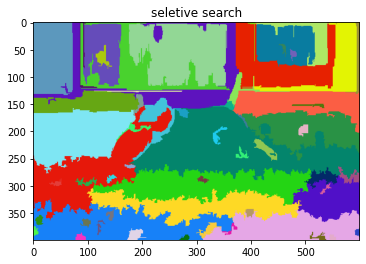

In [24]:
image_path = "dog.jpg"
visual = graph_segmentation_demo(image_path,0.1,2000,100)
plt_imshow("seletive search", visual)

### selective search를 이용한 region proposal

In [27]:
def selective_search_demo(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Create a Selective Search Segmentation Object using the default graph-based model
    ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
    ss.setBaseImage(image)
    

    # Choose the segmentation method (fast or quality)
    ss.switchToSelectiveSearchFast()

    # Run selective search and get the region proposals
    rects = ss.process()
    print(f"Total Region Proposals: {len(rects)}")
    print(rects)

    # Visualize a subset of region proposals
    num_show_rects = 100
    clone = image.copy()
    for i, rect in enumerate(rects):
        if i < num_show_rects:
            x, y, w, h = rect
            cv2.rectangle(clone, (x, y), (x+w, y+h), (0, 255, 0), 2)
        else:
            break

    return clone

Total Region Proposals: 1219
[[432 226  32  26]
 [378 126 214   4]
 [154 132 105 136]
 ...
 [  0   0 600 335]
 [152 132 293 152]
 [  0 159 600 241]]


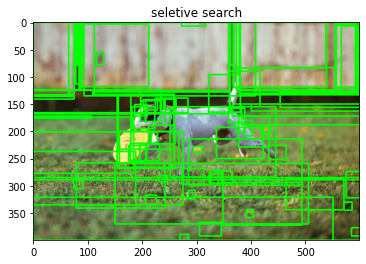

In [28]:
image_path = "dog.jpg"
visual = selective_search_demo(image_path)
plt_imshow("seletive search", visual)

### 객체 감지를 위한 OpenCV 선택적 검색

In [29]:
args = {
    "image": "dog.jpg",
    "method": "fast"
}

In [30]:
# load the input image
image = cv2.imread(args["image"])

# initialize OpenCV's selective search implementation and set the
# input image
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
ss.setBaseImage(image)

# check to see if we are using the *fast* but *less accurate* version
# of selective search
if args["method"] == "fast":
    print("[INFO] using *fast* selective search")
    ss.switchToSelectiveSearchFast()

# otherwise we are using the *slower* but *more accurate* version
else:
    print("[INFO] using *quality* selective search")
    ss.switchToSelectiveSearchQuality()

[INFO] using *fast* selective search


In [31]:
# run selective search on the input image
start = time.time()
rects = ss.process()
end = time.time()

# show how along selective search took to run along with the total
# number of returned region proposals
print("[INFO] selective search took {:.4f} seconds".format(end - start))
print("[INFO] {} total region proposals".format(len(rects)))

[INFO] selective search took 1.8580 seconds
[INFO] 1219 total region proposals


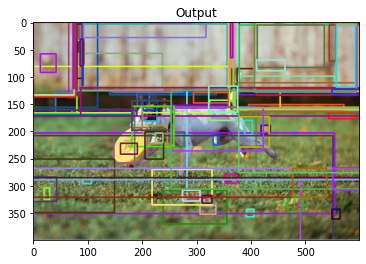

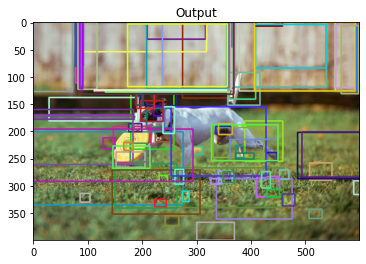

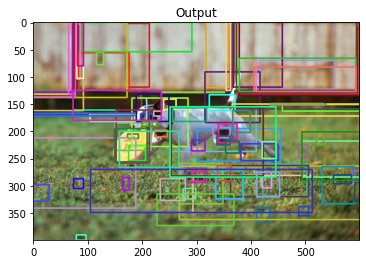

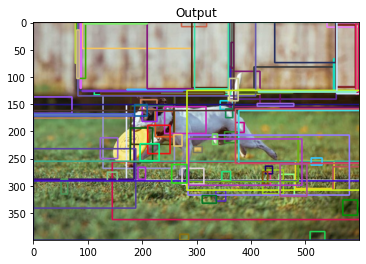

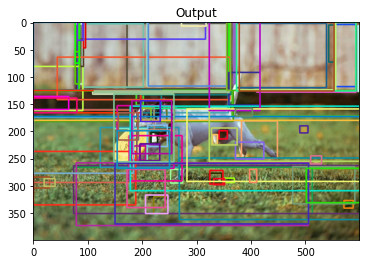

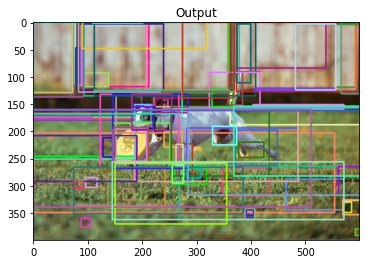

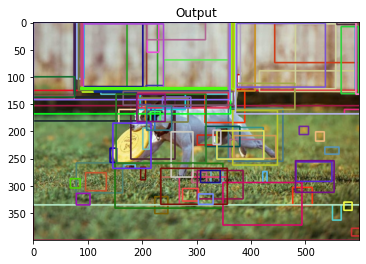

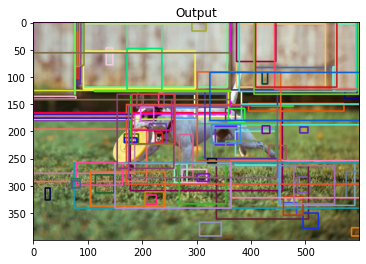

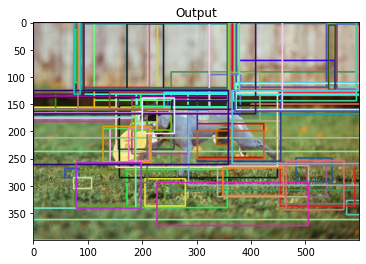

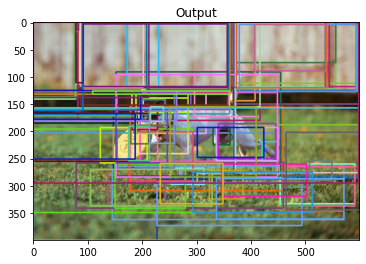

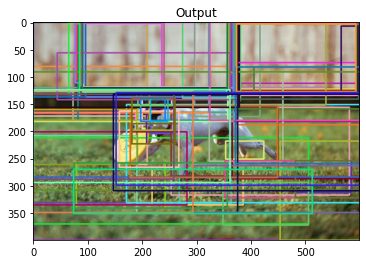

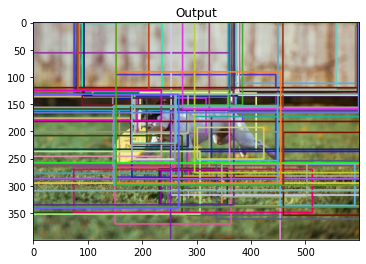

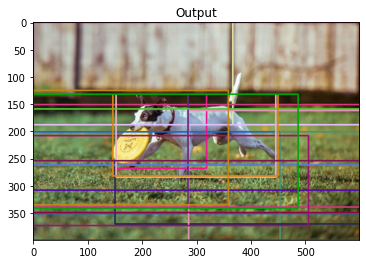

In [32]:
# loop over the region proposals in chunks (so we can better
# visualize them)
for i in range(0, len(rects), 100):
    # clone the original image so we can draw on it
    output = image.copy()

    # loop over the current subset of region proposals
    for (x, y, w, h) in rects[i:i + 100]:
        # draw the region proposal bounding box on the image
        color = [random.randint(0, 255) for j in range(0, 3)]
        cv2.rectangle(output, (x, y), (x + w, y + h), color, 2)

    # show the output image
    plt_imshow("Output", output)

In [33]:
%cd ..

/workspace/IYDgySjn6TKLn4kDcR/AI_VISION/1_day
